# 차원축소


### PCA(principal Component Analysis)
    1. 공분산 계산
    2. 고유벡터 계산
    3. 고유값 계산
    4. 변환행렬 계산
    5. 선형 변환

### Scree Plot
    - 주성분 수를 가로축으로
    - 고유값(Eigen Value)을 세로축으로
    - 주성분 수에 따라 고유값이 어떻게 변화하는지를 확인한다
    - 주성분 수가 얼마만큼 원본 데이터의 정보를 설명할 수 없는지를 나타낸다
    - x축은 (각 주성분 수 - 1)을 의미한다

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [9]:
iris = load_iris()
df=pd.DataFrame(data= iris.data,columns=iris.feature_names)
df['species']= iris.target

In [12]:
X=df.iloc[:,:4]
y=df['species']

X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42 ,stratify=y)
#DecisionTreeClassifier 객체 생성
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train,sample_weight=None)

DecisionTreeClassifier(random_state=42)

In [14]:
# PCA

pca= PCA(n_components= 4)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


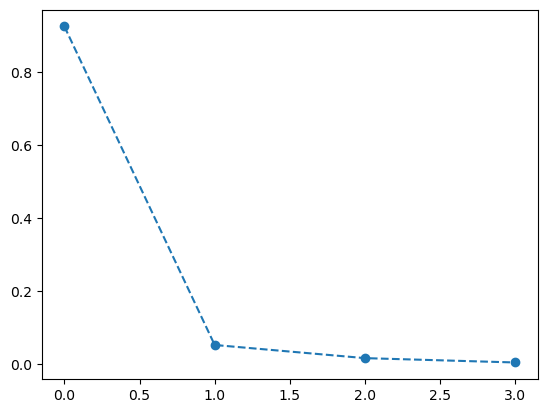

In [15]:
# Scree plot
plt.plot(pca.explained_variance_ratio_, 'o--')

In [16]:
# PCA
 
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_1']= pca_transformed[:,0]
df['pca_2']= pca_transformed[:,1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755


<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

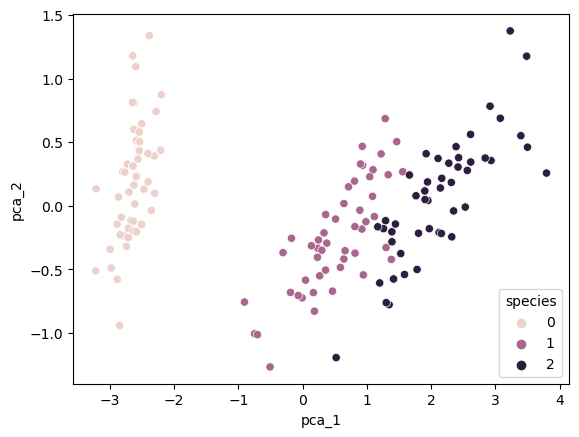

In [17]:
import seaborn as sns

sns.scatterplot(x=df['pca_1'], y=df['pca_2'], hue= df['species'], legend='auto')

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터 분할
y= df['species']
X= df.iloc[:,5:]    # pca_1,pca_2만 이용한다

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify= y)

# 학습

tree_model =  DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train,y_train)

# 평가

score = tree_model.score(X_test,y_test)
print("의사결정 나무 정확도 : {0:2f}".format(score))

의사결정 나무 정확도 : 0.894737
